KNN-K-NEAREST NEIGHBORS


INTRODUCTION

What do you mean by K-Nearest Neighbors(KNN) Algorithm?

The K-Nearest Neighbors (KNN) algorithm is a type of supervised learning algorithm used for both classification and regression tasks. It is often described as a memory-based, instance-based, or lazy learning algorithm.

For classification, KNN uses a majority voting mechanism — the new point is assigned the class that is most common among its ‘k’ nearest neighbors.
For regression, it predicts the average (or weighted average) of the values of those neighbors.

KNN is known for being simple, intuitive, and often highly accurate, especially when the data set is not too large and features are properly scaled. However, since it stores all training examples and performs computation at prediction time, it can be slow and memory-intensive for large datasets.

Because of its accuracy and simplicity, KNN is commonly used in areas like recommendation systems, pattern recognition, image classification, and anomaly detection — where interpretability is less important than predictive performance.


OBJECTIVE 


What do we use KNN and why can it be prefered over certain other classification and regression algorithms?

1..Simplicity and Intuitiveness: KNN is easy to understand and implement. It follows a simple rule: an object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its K nearest neighbors.

2..No Training Phase: Unlike many other machine learning algorithms, KNN does not require a training phase. This makes it faster to set up and use, especially for small to medium-sized datasets.

3..Adaptability: KNN can adapt to changes in the data without retraining. This makes it suitable for applications where the data distribution might change over time.

4..Non-parametric: KNN is a non-parametric method, meaning it makes no assumptions about the underlying data distribution. This makes it versatile and applicable to a wide range of datasets.

5..Effective for Small Datasets: KNN can perform well on small datasets where other complex algorithms might struggle due to insufficient data.



KEY IDEAS 

Instead of building an explicit model from the training data, KNN memorizes the entire dataset and uses it directly to make predictions. When a new data point needs to be classified or its value predicted, the algorithm looks at the ‘k’ closest data points (neighbors) in the training set, based on a distance metric such as Euclidean, Manhattan, or Minkowski distance.



Choosing the value of k:

1..The algorithms performance can be sensitive the value of k. When k is small, the model is sensitive to noise and is prone to overfitting whereas large values of k can lead to underfitting, especially if there is class inbalance.

2..When the number of classes is 2, k should be an odd number to prevent any 'tied votes' when making predictions.


3..The value of k should be bigger than the number of classes for similar reasons.


KNN uses distance metrics to identify nearest neighbor, these neighbors are used for classification and regression task. To identify nearest neighbor we use below distance metrics:

1. Euclidean Distance
Euclidean distance is defined as the straight-line distance between two points in a plane or space. You can think of it like the shortest path you would walk if you were to go directly from one point to another.

   $d=D(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$

2. Manhattan Distance
This is the total distance you would travel if you could only move along horizontal and vertical lines like a grid or city streets. It’s also called "taxicab distance" because a taxi can only drive along the grid-like streets of a city.

   $d=D_{\text{Manhattan}}(x, y) = \sum_{i=1}^{n} |x_i - y_i|$

3. Minkowski Distance
Minkowski distance is like a family of distances, which includes both Euclidean and Manhattan distances as special cases.

   $d=D(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}$
   
From the formula above, when p=2, it becomes the same as the Euclidean distance formula and when p=1, it turns into the Manhattan distance formula. Minkowski distance is essentially a flexible formula that can represent either Euclidean or Manhattan distance depending on the value of p.


The basic intuition behind KNN is that things that are similar to each other are near each other.

WE WILL BE WORKING ON THE IRIS DATASET


There are a few important steps to be done before we jump to training and testing data and applying the machine learning algorithm.
They are data cleaning,analysis and visualization.
Let us now start with basic cleaning and analysis of our dataset.


In [64]:
#Firstly we need to several imports that will aid our analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('husl')#color palette for seaborn
%matplotlib inline

data=pd.read_csv('Iris.csv')
data=data.drop(columns=["Id"])
print(data.info())
print(data.shape)
print(data.head())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
(150, 5)
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000

In [65]:
#checking for any null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [66]:
#finding duplicates
data.duplicated().sum()

np.int64(3)

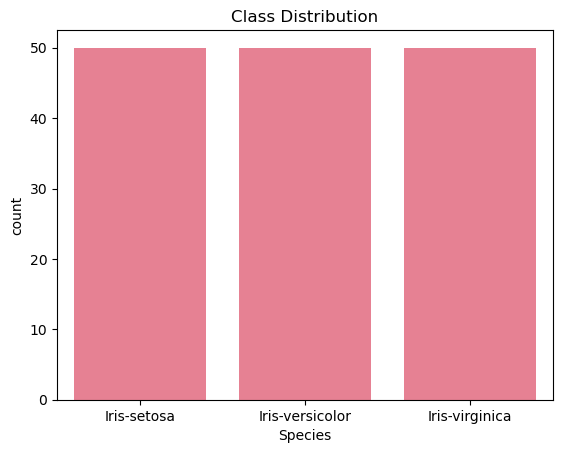

In [67]:
#checking the distribution of the target variable for class imbalances
data['Species'].value_counts()
sns.countplot(x="Species",data=data)
plt.title("Class Distribution")
plt.show()

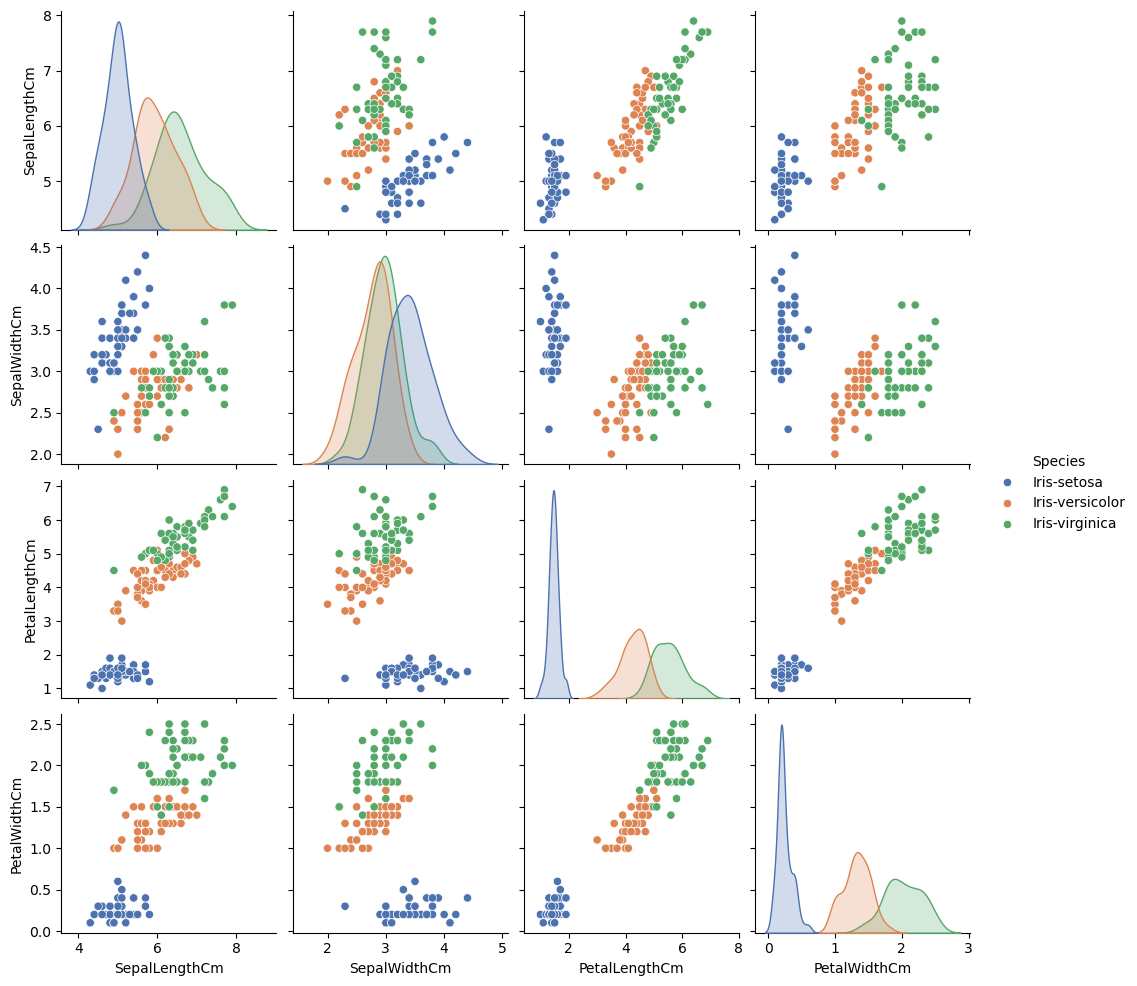

In [68]:
#Now we will be visualizing our dataset
#Using pairplots
sns.pairplot(data,hue="Species",diag_kind='kde',palette='deep')
plt.show()



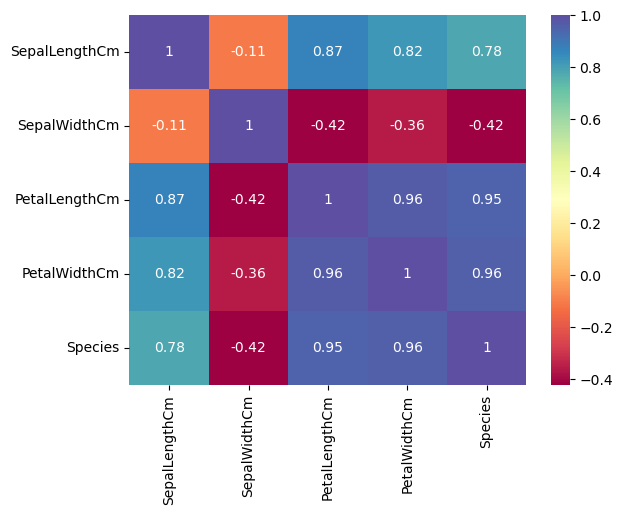

In [69]:
#Now we are going to make a correlation heatmap to see how all the numerical features sre related to each other
data["Species"]=pd.factorize(data["Species"])[0]
corr_data=data.corr()
sns.heatmap(corr_data,annot=True,cmap='Spectral')
plt.show()

What can we infer from the correlation heatmap?

From the heatmap we can infer that the features petal length and petal width have a very strong positive correlation with species of iris.Hence we should focus on these two features while training our model if we want it to classify future data accurately.Other features are valid as well for example sepal length also has a positive correlation of 0.78 but that is not very strong hence we may not depend on this feature heavily.

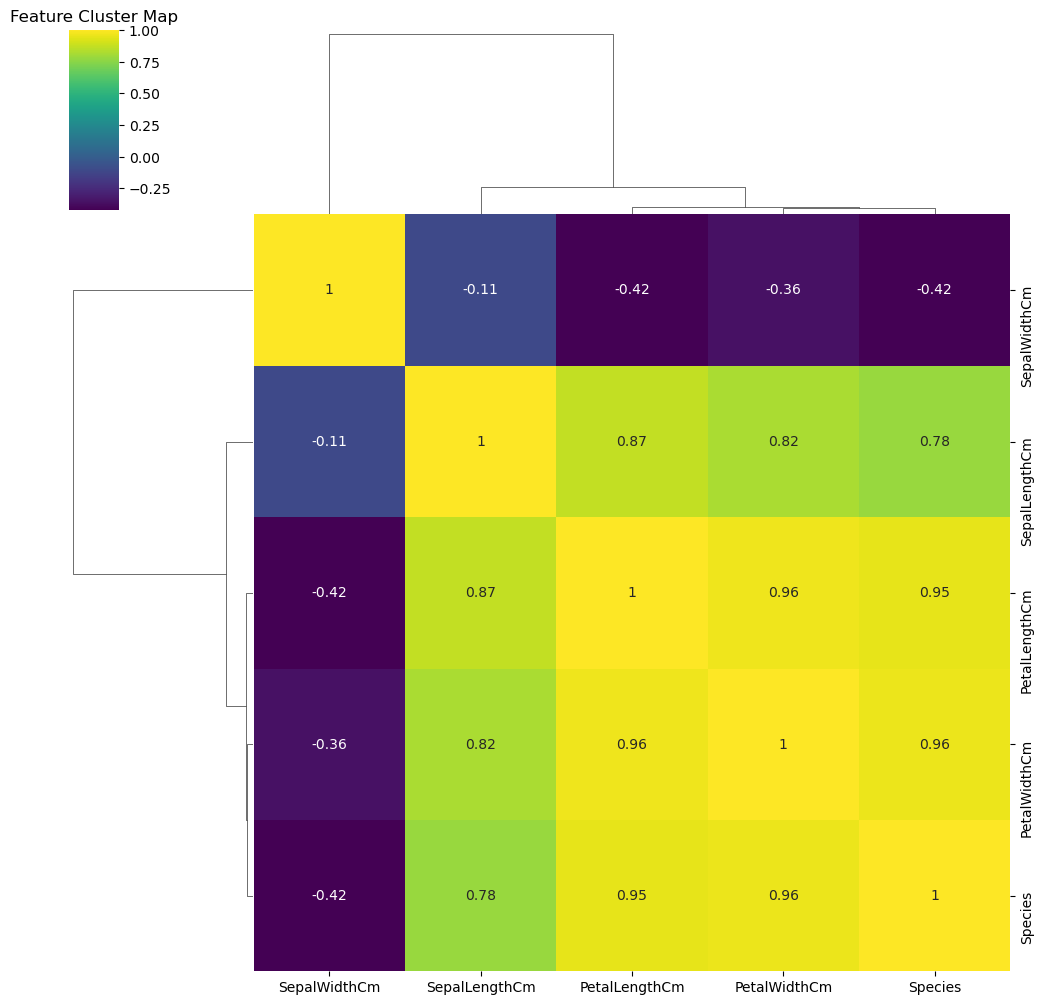

In [70]:
#Making a clustermap for heirarchical clustering visualization
sns.clustermap(corr_data,annot=True,cmap='viridis')
plt.title("Feature Cluster Map")
plt.show()




In [71]:
#Now that we have seen the relations between the features in our dataset we can start implementing the machine learning algorithm-KNN
#STEP 1-Split the dataset
'''There are several ways of splitting a dataset.The ratio in which which you want to split
your data is upto you.Here we will use 4:1 split i.e. 80 percent of the data is training data while the remaining 20 percent is for testing.
'''
train_data=data.sample(frac=0.8,random_state=42)#This random_state is the function to ensure that you get the same split everytime you run the code
test_data=data.drop(train_data.index)
print(train_data)
X_train=train_data.drop(columns=["Species"]).values
y_train=train_data["Species"].values
X_test=test_data.drop(columns=["Species"]).values
y_test=test_data["Species"].values
print(y_train)





     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
73             6.1           2.8            4.7           1.2        1
18             5.7           3.8            1.7           0.3        0
118            7.7           2.6            6.9           2.3        2
78             6.0           2.9            4.5           1.5        1
76             6.8           2.8            4.8           1.4        1
..             ...           ...            ...           ...      ...
139            6.9           3.1            5.4           2.1        2
61             5.9           3.0            4.2           1.5        1
147            6.5           3.0            5.2           2.0        2
79             5.7           2.6            3.5           1.0        1
59             5.2           2.7            3.9           1.4        1

[120 rows x 5 columns]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 

In [72]:
#Now we are going to define the function for finding euclidean distance
def euclidean_dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [73]:
#Now making the KNN algo from scratch
from collections import Counter


def knn_classifier(X_train,y_train,x_test,k=5):


    #1)finding euclidean distance of all points from the test data point
    dist=[euclidean_dist(x_test,x_train) for x_train in X_train]

    #2)finding the nearest data points
    k_nearest_index=np.argsort(dist)[:k]

    #3)getting the labels of the closest training data points
    k_nearest_labels=[y_train[i] for i in k_nearest_index]

    #4)seeing which labels are in majority
    majority_label=Counter(k_nearest_labels).most_common(1)[0][0]

    return majority_label

#testing our algo now
k=5
prediction=[knn_classifier(X_train,y_train,x_test,k)for x_test in X_test]
print(y_test)
print(prediction)#since we used np array which is probably why it isnt a list in the output

        
    

[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2)]


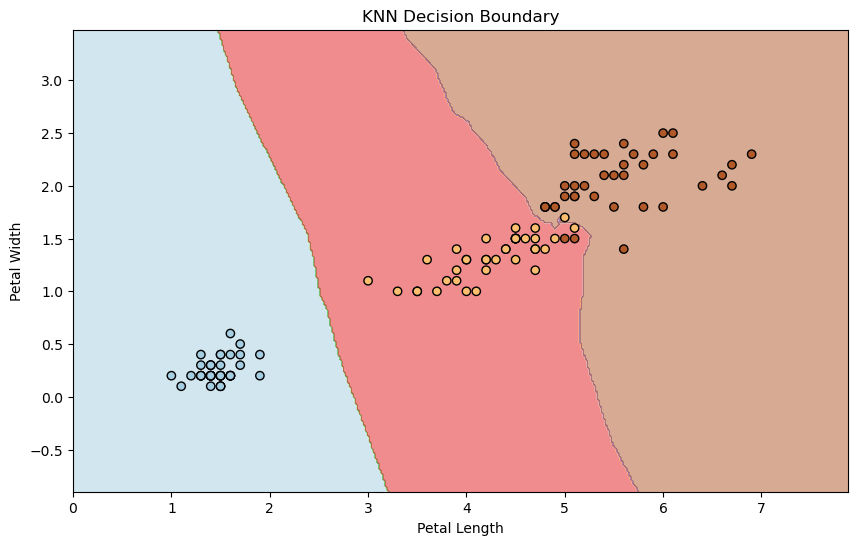

In [74]:
#decision boundary
X_dec = X_train[:,-2:]
'''here we 
are taking last two columns i.e petal 
length and width the features wuth showed highest 
positive correlation with our target variable species'''
y_dec = y_train

# Create a mesh grid for visualization
h = 0.02
x_min, x_max = X_dec[:, 0].min() - 1, X_dec[:, 0].max() + 1
y_min, y_max = X_dec[:, 1].min() - 1, X_dec[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict each point on grid using our KNN
Z = np.array([
    knn_classifier(X_dec, y_dec, np.array([x, y]), k)
    for x, y in np.c_[xx.ravel(), yy.ravel()]
])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
plt.scatter(X_dec[:, 0], X_dec[:, 1], c=y_dec, cmap=plt.cm.Paired, edgecolor='k')
plt.title(f"KNN Decision Boundary")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()


In [75]:
#let us now see how well our algo is going to perform
accuracy=np.mean(prediction==y_test)*100
print(accuracy)

96.66666666666667


In [76]:
#confusion matrix
#First we will find the diff unique classes
classes=np.unique(y_test)
len_cls=len(classes)

confusion_mat=np.zeros((len_cls,len_cls),dtype=int)

#now entering values into our confusion matrix
for act,pred in zip(y_test,prediction):
    i=np.where(classes==act)[0][0]
    j=np.where(classes==pred)[0][0]
    confusion_mat[i][j]+=1    
#now looking at evaluation metrics
#First -accuracy=correct predictions/total predictions 
accuracy=np.trace(confusion_mat)/np.sum(confusion_mat)
print(accuracy)
#Second -precision=true positives/total prediction,recall=true postives/true positives+false positives
precision=np.zeros(len_cls)
recall=np.zeros(len_cls)
f1_score=np.zeros(len_cls)
for i in range(len_cls):
    tp=confusion_mat[i,i]
    fp=np.sum(confusion_mat[:,i])-tp
    precision[i]=tp/(tp+fp)
    fn=np.sum(confusion_mat[i,:])-tp
    recall[i]=tp/tp+fn
    f1_score[i]=2*(precision[i]*recall[i])/(precision[i]+recall[i])
print(precision)
print(recall)
print(f1_score)



0.9666666666666667
[1.         0.91666667 1.        ]
[1. 1. 2.]
[1.         0.95652174 1.33333333]


In [77]:
'''Above we took a random value of k as 5.This gave us a high accuracy.
But how do we decide which value of k is best for our dataset.Is 100 percent accuracy possible 
for some value of k?
We will use k-fold cross validation here to find the best value of 
k for our dataset.Here 
data:our dataset,
k:k nearest neighbors,
splits:number of cv folds'''
data_new=data.values
def k_fold_cv(data_new,k=5,split=3):
    np.random.shuffle(data_new)#this is needed to prevent bias while training
    folds=len(data_new)//split
    accuracies=[]

    for i in range(split):
        test_data=data_new[i*folds:(i+1)*folds]
        train_data=np.concatenate([data_new[:i*folds],data_new[(i+1)*folds:]])
        X_train,y_train=train_data[:,:-1],train_data[:,-1]
        X_test,y_test=test_data[:,:-1],test_data[:,-1]
        preds=[knn_classifier(X_train,y_train,x_test,k=5) for x_test in X_test]
        preds=np.array(preds)
        acc=np.mean(preds==y_test)
        accuracies.append(acc)

    return np.mean(accuracies)


for k_n in range(1,12):
    avg_acc=k_fold_cv(data_new,k=k_n,split=3)
    print(avg_acc*100)

  



96.66666666666667
95.33333333333333
97.33333333333333
95.33333333333333
96.0
96.66666666666667
96.66666666666667
96.0
97.33333333333333
95.33333333333333
96.66666666666667


An important thing to note here is that the Iris dataset is very clean and well-separated so even at k=1 we get a very high accuracy of 98 percent.But usually such low values of k lead to overfitting i.e. k can memorize training points so any outliers or changes can affect our model.Hence it is important to take a larger value of k almost always.

Analysis & Observations – Discuss results, limitations, and insights

Results-Here we classified the iris dataset using the knn algorithm.We used the features to find the target variable in this case the species.

LIMITATIONS-

1..Computationally expensive due to its lazy learning nature.Predictions amde based on the entire training dataset.

2..Sensitive to scale of features since it relies on distance calculations.Features with larger values can dominate the distance calculation, leading to biased results.

3..Sensitive to Irrelevant Features: KNN is sensitive to irrelevant features because it considers all features equally important when calculating distances. This can lead to inaccurate predictions if there are many irrelevant features.

4..Difficult to Choose the Right K Value: The choice of K (the number of nearest neighbors to consider) can significantly affect the performance of the algorithm. Choosing an inappropriate K value can lead to overfitting or underfitting.

5..Memory Consumption: Since KNN stores the entire dataset in memory, it can consume a lot of memory, especially for large datasets.


Conclusion & Learnings – Summarize what you learned and how it can be applied.

Learnings-Data cleaning is essential in order to proceed with training of the algorithm.It is important to plot all features and learn their relation with each other and to the target variable.

Hence we need good clustermaps and heatmaps which can also help find the correlation between features.Evaluation metrics are necessary to figure out the performance of our model i.e. how accurately can it predict the target variable.

The evaluation metrics we used here were accuracy,precision,recall and f1 score.Feature scaling is also important but in the dataset we took here it wasn't necessary.

Applications of KNN:

1..KNN is used in finance, healthcare, and recommender systems.

2..Content Recommendations

3..Image Recognition

4..Recognizes patterns and detects intrusions.

5..Anomaly Detection
